# EDA

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,  cross_val_score, cross_val_predict


In [2]:
#Import Dataset
df = pd.read_csv('C:/Users/olowe_m/OneDrive/DA Material/DS Exercise/engine_temperature_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Temperature_4,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524585,19.156471,20.252921,17.938459,NaN,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640838,20.221044,16.811694,NaN,20.393958,-2.094215,0.413976,18.0,26.265317
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836814,17.948295,NaN,20.050071,0.001141,0.205430,18.0,26.865346
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668422,19.827209,19.323598,17.240519,NaN,20.047196,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009194,17.400569,19.078639,20.389726,0.233597,0.525972,18.0,31.672931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134742,46.081191,43.448561,37.791605,NaN,24.973909,1.870116,-0.108926,72.0,76.828757
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434472,46.698519,42.998806,37.115536,NaN,23.673018,2.584470,0.082514,72.0,74.926294
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515546,43.172042,37.478894,26.254675,23.250497,1.362473,0.048257,72.0,77.421741
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814173,42.790452,38.066297,NaN,24.097228,-0.138888,0.165157,72.0,58.137476


In [3]:
df.columns.tolist()

['Vq',
 'Vd',
 'Id',
 'Iq',
 'refrigerant_liquid',
 'Temperature_1',
 'Temperature_2',
 'Temperature_3',
 'Temperature_4',
 'Ambient_Temperature',
 'RPM',
 'Torque',
 'Test_id',
 'Temperature_Engine']

In [4]:
df.isnull().sum()

Vq                          77
Vd                          74
Id                          90
Iq                          82
refrigerant_liquid          71
Temperature_1               95
Temperature_2               67
Temperature_3               79
Temperature_4          1121811
Ambient_Temperature         72
RPM                         81
Torque                      65
Test_id                     78
Temperature_Engine          68
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246457 entries, 0 to 1246456
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Vq                   1246380 non-null  float64
 1   Vd                   1246383 non-null  float64
 2   Id                   1246367 non-null  float64
 3   Iq                   1246375 non-null  float64
 4   refrigerant_liquid   1246386 non-null  float64
 5   Temperature_1        1246362 non-null  float64
 6   Temperature_2        1246390 non-null  float64
 7   Temperature_3        1246378 non-null  float64
 8   Temperature_4        124646 non-null   float64
 9   Ambient_Temperature  1246385 non-null  float64
 10  RPM                  1246376 non-null  float64
 11  Torque               1246392 non-null  float64
 12  Test_id              1246379 non-null  float64
 13  Temperature_Engine   1246389 non-null  float64
dtypes: float64(14)
memory usage: 133.1 MB


In [6]:
df.describe()

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Temperature_4,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
count,1.246380e+06,1.246383e+06,1.246367e+06,1.246375e+06,1.246386e+06,1.246362e+06,1.246390e+06,1.246378e+06,124646.000000,1.246385e+06,1.246376e+06,1.246392e+06,1.246379e+06,1.246389e+06
mean,3.290062e+05,3.690445e+05,4.331919e+05,3.771307e+05,3.851480e+05,3.611179e+05,3.771473e+05,4.012097e+05,25.010599,3.129299e+05,3.234991e+05,3.450636e+05,3.771360e+05,4.092468e+05
std,5.735347e+07,6.074987e+07,6.582103e+07,6.140681e+07,6.205634e+07,6.008644e+07,6.140644e+07,6.333614e+07,4.984006,5.593705e+07,5.664982e+07,5.873535e+07,6.140671e+07,6.396606e+07
min,-1.796088e+01,-1.315217e+02,-2.695088e+02,-2.936702e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2.904238,-1.000000e+00,-3.302056e+02,-5.423684e+02,-1.000000e+00,-1.000000e+00
25%,1.117340e+01,-7.309997e+01,-1.107475e+02,8.902138e-01,1.681712e+01,4.349834e+01,3.969323e+01,3.095588e+01,21.653814,2.362215e+01,3.014272e+02,-5.785960e-01,1.900000e+01,4.735313e+01
50%,4.731665e+01,-5.672607e+00,-4.795936e+01,1.250594e+01,2.556326e+01,6.568142e+01,5.740933e+01,4.464799e+01,25.010011,2.513932e+01,2.354140e+03,2.029806e+01,4.600000e+01,6.630659e+01
75%,9.073700e+01,1.571379e+00,-2.810433e+00,1.032537e+02,4.802040e+01,8.881062e+01,7.708493e+01,6.026256e+01,28.371257,2.655882e+01,4.339721e+03,2.060133e+02,6.600000e+01,8.041018e+01
max,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,47.685087,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


In [7]:
df.nunique()

Vq                     1246167
Vd                     1246165
Id                     1246141
Iq                     1246152
refrigerant_liquid     1246139
Temperature_1          1246097
Temperature_2          1246156
Temperature_3          1246160
Temperature_4           124646
Ambient_Temperature    1246146
RPM                    1246126
Torque                 1246133
Test_id                     69
Temperature_Engine     1246141
dtype: int64

In [8]:
df.shape

(1246457, 14)

In [9]:
df.drop('Temperature_4', axis=1, inplace=True)
df

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524585,19.156471,20.252921,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640838,20.221044,16.811694,20.393958,-2.094215,0.413976,18.0,26.265317
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836814,17.948295,20.050071,0.001141,0.205430,18.0,26.865346
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668422,19.827209,19.323598,17.240519,20.047196,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009194,17.400569,20.389726,0.233597,0.525972,18.0,31.672931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134742,46.081191,43.448561,37.791605,24.973909,1.870116,-0.108926,72.0,76.828757
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434472,46.698519,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926294
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515546,43.172042,37.478894,23.250497,1.362473,0.048257,72.0,77.421741
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814173,42.790452,38.066297,24.097228,-0.138888,0.165157,72.0,58.137476


In [10]:
df.isna().any(axis=1).sum()

998

In [11]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Vq                     77
Vd                     74
Id                     90
Iq                     82
refrigerant_liquid     71
Temperature_1          95
Temperature_2          67
Temperature_3          79
Ambient_Temperature    72
RPM                    81
Torque                 65
Test_id                78
Temperature_Engine     68
dtype: int64

In [12]:
missing_data = df.isnull()
missing_data.shape

#Using a for loop in Python to figure out the number of missing values in each column
for column in missing_data.columns.values.tolist(): 
    print(column)
    print(missing_data[column].value_counts())
    print("") 

Vq
False    1246380
True          77
Name: Vq, dtype: int64

Vd
False    1246383
True          74
Name: Vd, dtype: int64

Id
False    1246367
True          90
Name: Id, dtype: int64

Iq
False    1246375
True          82
Name: Iq, dtype: int64

refrigerant_liquid
False    1246386
True          71
Name: refrigerant_liquid, dtype: int64

Temperature_1
False    1246362
True          95
Name: Temperature_1, dtype: int64

Temperature_2
False    1246390
True          67
Name: Temperature_2, dtype: int64

Temperature_3
False    1246378
True          79
Name: Temperature_3, dtype: int64

Ambient_Temperature
False    1246385
True          72
Name: Ambient_Temperature, dtype: int64

RPM
False    1246376
True          81
Name: RPM, dtype: int64

Torque
False    1246392
True          65
Name: Torque, dtype: int64

Test_id
False    1246379
True          78
Name: Test_id, dtype: int64

Temperature_Engine
False    1246389
True          68
Name: Temperature_Engine, dtype: int64



<AxesSubplot:>

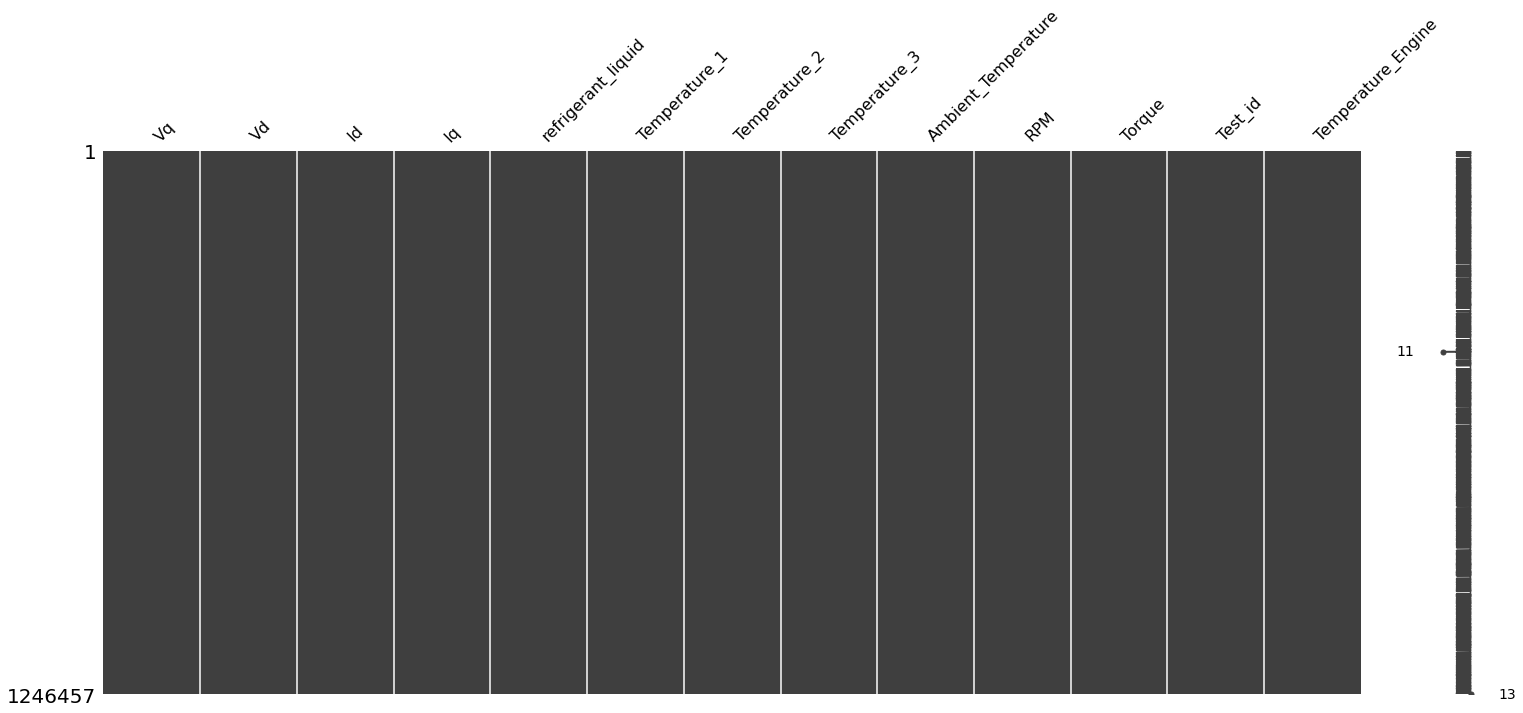

In [13]:
import missingno as msno

msno.matrix(df)

In [14]:
df.columns


Index(['Vq', 'Vd', 'Id', 'Iq', 'refrigerant_liquid', 'Temperature_1',
       'Temperature_2', 'Temperature_3', 'Ambient_Temperature', 'RPM',
       'Torque', 'Test_id', 'Temperature_Engine'],
      dtype='object')

In [15]:
#Drop outliers in the data set
df.mask((df - df.mean()).abs() > 2 * df.std())

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524585,19.156471,20.252921,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640838,20.221044,16.811694,20.393958,-2.094215,0.413976,18.0,26.265317
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836814,17.948295,20.050071,0.001141,0.205430,18.0,26.865346
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668422,19.827209,19.323598,17.240519,20.047196,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009194,17.400569,20.389726,0.233597,0.525972,18.0,31.672931
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134742,46.081191,43.448561,37.791605,24.973909,1.870116,-0.108926,72.0,76.828757
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434472,46.698519,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926294
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515546,43.172042,37.478894,23.250497,1.362473,0.048257,72.0,77.421741
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814173,42.790452,38.066297,24.097228,-0.138888,0.165157,72.0,58.137476


In [16]:
df = df.mask((df - df.mean()).abs() > 2 * df.std()).dropna()

In [17]:
df.describe()

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
count,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06,1.244862e+06
mean,5.360355e+01,-2.339189e+01,-6.735049e+01,3.711180e+01,3.457206e+01,6.714221e+01,5.828831e+01,4.727756e+01,2.500791e+01,2.568706e+03,6.779377e+01,4.364729e+01,6.478752e+01
std,4.433938e+01,6.259843e+01,6.456429e+01,9.343126e+01,2.188931e+01,2.871397e+01,2.302499e+01,2.010680e+01,2.034422e+00,2.203080e+03,1.718800e+02,2.473867e+01,2.151659e+01
min,-1.796088e+01,-1.315217e+02,-2.695088e+02,-2.936702e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.302056e+02,-5.423684e+02,-1.000000e+00,-1.000000e+00
25%,1.116962e+01,-7.309912e+01,-1.107520e+02,8.902130e-01,1.681709e+01,4.349679e+01,3.969156e+01,3.095498e+01,2.362209e+01,3.014276e+02,-5.790200e-01,1.900000e+01,4.735205e+01
50%,4.731129e+01,-5.674293e+00,-4.797193e+01,1.249236e+01,2.556191e+01,6.568001e+01,5.740751e+01,4.464664e+01,2.513922e+01,2.354035e+03,2.027404e+01,4.600000e+01,6.630582e+01
75%,9.072941e+01,1.571308e+00,-2.811756e+00,1.032398e+02,4.801960e+01,8.880723e+01,7.708348e+01,6.026099e+01,2.655864e+01,4.339163e+03,2.060020e+02,6.600000e+01,8.040791e+01
max,1.331938e+02,1.315471e+02,6.586276e-01,3.024428e+02,9.935340e+01,1.434231e+02,1.145356e+02,1.012668e+02,3.230200e+01,7.204396e+03,5.743026e+02,8.200000e+01,1.418961e+02


In [18]:
dx = pd.read_csv('C:/Users/olowe_m/OneDrive/DA Material/DS Exercise/engine_temperature_data.csv').astype(np.float32)
dx

,Unnamed: 0,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Temperature_4,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,0.0,-0.522990,-0.497177,0.001435,0.041438,16.524586,19.156471,20.252920,17.938459,NaN,20.447550,-1.770534,0.378896,18.0,30.931990
1,1.0,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640839,20.221045,16.811695,NaN,20.393957,-2.094215,0.413976,18.0,26.265318
2,2.0,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836815,17.948296,NaN,20.050070,0.001141,0.205430,18.0,26.865345
3,3.0,-0.267732,-0.216253,-0.052532,-0.111152,16.668421,19.827209,19.323597,17.240519,NaN,20.047195,-0.051005,0.516955,18.0,28.393085
4,4.0,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009193,17.400570,19.078638,20.389725,0.233597,0.525972,18.0,31.672932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,1246452.0,-2.079912,0.897991,-1.901258,1.336346,29.134741,46.081192,43.448563,37.791607,NaN,24.973909,1.870116,-0.108926,72.0,76.828758
1246453,1246453.0,-2.228063,0.709176,-1.774801,0.806673,29.434473,46.698521,42.998806,37.115536,NaN,23.673018,2.584470,0.082514,72.0,74.926292
1246454,1246454.0,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515545,43.172043,37.478893,26.254675,23.250498,1.362473,0.048257,72.0,77.421745
1246455,1246455.0,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814175,42.790451,38.066296,NaN,24.097227,-0.138888,0.165157,72.0,58.137478


In [19]:
# Making a list of missing value types
missing_values = ["n/a", "na", "missing","nan"]
dx = pd.read_csv('C:/Users/olowe_m/OneDrive/DA Material/DS Exercise/engine_temperature_data.csv', na_values = missing_values).astype(np.float32)
dx.drop('Unnamed: 0', axis=1, inplace=True)
dx.drop('Temperature_4', axis=1, inplace=True)
dx.dropna(axis=0,inplace=True)
dx

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524586,19.156471,20.252920,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640839,20.221045,16.811695,20.393957,-2.094215,0.413976,18.0,26.265318
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836815,17.948296,20.050070,0.001141,0.205430,18.0,26.865345
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668421,19.827209,19.323597,17.240519,20.047195,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009193,17.400570,20.389725,0.233597,0.525972,18.0,31.672932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134741,46.081192,43.448563,37.791607,24.973909,1.870116,-0.108926,72.0,76.828758
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434473,46.698521,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926292
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515545,43.172043,37.478893,23.250498,1.362473,0.048257,72.0,77.421745
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814175,42.790451,38.066296,24.097227,-0.138888,0.165157,72.0,58.137478


In [20]:
dx.isnull().sum()

Vq                     0
Vd                     0
Id                     0
Iq                     0
refrigerant_liquid     0
Temperature_1          0
Temperature_2          0
Temperature_3          0
Ambient_Temperature    0
RPM                    0
Torque                 0
Test_id                0
Temperature_Engine     0
dtype: int64

In [21]:
dx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245459 entries, 0 to 1246456
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Vq                   1245459 non-null  float32
 1   Vd                   1245459 non-null  float32
 2   Id                   1245459 non-null  float32
 3   Iq                   1245459 non-null  float32
 4   refrigerant_liquid   1245459 non-null  float32
 5   Temperature_1        1245459 non-null  float32
 6   Temperature_2        1245459 non-null  float32
 7   Temperature_3        1245459 non-null  float32
 8   Ambient_Temperature  1245459 non-null  float32
 9   RPM                  1245459 non-null  float32
 10  Torque               1245459 non-null  float32
 11  Test_id              1245459 non-null  float32
 12  Temperature_Engine   1245459 non-null  float32
dtypes: float32(13)
memory usage: 71.3 MB


In [22]:
dx.describe()

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
count,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06,1.245459e+06
mean,3.291963e+05,3.693412e+05,4.255444e+05,3.773732e+05,3.854004e+05,3.613128e+05,3.773717e+05,4.014588e+05,3.131390e+05,3.220031e+05,3.452585e+05,3.773714e+05,4.094890e+05
std,5.737373e+07,6.077128e+07,6.523116e+07,6.142828e+07,6.207824e+07,6.010714e+07,6.142826e+07,6.335824e+07,5.595701e+07,5.666980e+07,5.875639e+07,6.142827e+07,6.398863e+07
min,-1.796088e+01,-1.315217e+02,-2.695088e+02,-2.936702e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.302056e+02,-5.423685e+02,-1.000000e+00,-1.000000e+00
25%,1.117209e+01,-7.309986e+01,-1.107475e+02,8.902501e-01,1.681709e+01,4.349802e+01,3.969279e+01,3.095523e+01,2.362210e+01,3.014283e+02,-5.785310e-01,1.900000e+01,4.735301e+01
50%,4.731562e+01,-5.673329e+00,-4.796054e+01,1.252269e+01,2.556274e+01,6.568133e+01,5.740902e+01,4.464783e+01,2.513940e+01,2.354110e+03,2.031098e+01,4.600000e+01,6.630656e+01
75%,9.073551e+01,1.571379e+00,-2.810692e+00,1.032586e+02,4.802025e+01,8.881231e+01,7.708545e+01,6.026241e+01,2.655890e+01,4.339601e+03,2.060130e+02,6.600000e+01,8.041031e+01
max,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10,1.000000e+10


In [23]:
dx = dx.mask((dx - dx.mean()).abs() > 2 * dx.std()).dropna()
dx

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524586,19.156471,20.252920,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640839,20.221045,16.811695,20.393957,-2.094215,0.413976,18.0,26.265318
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836815,17.948296,20.050070,0.001141,0.205430,18.0,26.865345
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668421,19.827209,19.323597,17.240519,20.047195,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009193,17.400570,20.389725,0.233597,0.525972,18.0,31.672932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134741,46.081192,43.448563,37.791607,24.973909,1.870116,-0.108926,72.0,76.828758
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434473,46.698521,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926292
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515545,43.172043,37.478893,23.250498,1.362473,0.048257,72.0,77.421745
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814175,42.790451,38.066296,24.097227,-0.138888,0.165157,72.0,58.137478


In [24]:
from scipy import stats
dx[(np.abs(stats.zscore(dx)) < 3).all(axis=1)]
dx

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524586,19.156471,20.252920,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640839,20.221045,16.811695,20.393957,-2.094215,0.413976,18.0,26.265318
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836815,17.948296,20.050070,0.001141,0.205430,18.0,26.865345
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668421,19.827209,19.323597,17.240519,20.047195,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009193,17.400570,20.389725,0.233597,0.525972,18.0,31.672932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134741,46.081192,43.448563,37.791607,24.973909,1.870116,-0.108926,72.0,76.828758
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434473,46.698521,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926292
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515545,43.172043,37.478893,23.250498,1.362473,0.048257,72.0,77.421745
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814175,42.790451,38.066296,24.097227,-0.138888,0.165157,72.0,58.137478


C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


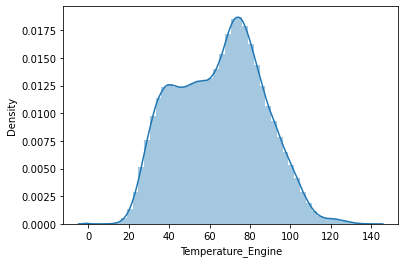

In [25]:
sns.distplot(dx['Temperature_Engine']);

The target variable appear to exhibit 'bimodal' characteristics. This will be investigated further.

## Model building

In [26]:
X = dx.drop('Temperature_Engine', axis=1)
y = dx['Temperature_Engine']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995889, 12)
(248973, 12)
(995889,)
(248973,)


# Strategy 1: Regression Models

## Decision Tree Model

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import mean_absolute_error, accuracy_score

model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
base_preds = model_dt.predict(X_test)

# get predicted prices on validation data using training data
print("Decision regression score : ", model_dt.score(X_test, y_test))
print("Mean Square Error: ",mean_absolute_error(y_test, base_preds))


Decision regression score :  0.8754066090010131
Mean Square Error:  5.959952310425226


## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import mean_absolute_error, accuracy_score

model_rf = RandomForestRegressor(n_estimators=10)
model_rf.fit(X_train,y_train)
base_preds = model_rf.predict(X_test)

# get predicted prices on validation data using training data
print("Random forest regression score : ", model_rf.score(X_test, y_test))
print("Mean Square Error: ", mean_absolute_error(y_test, base_preds))

Random forest regression score :  0.9317414990867103
Mean Square Error:  4.434583218325511


## Ridge Regression Model

In [30]:
#Creating Ridge Regression model
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import mean_squared_error

rd = Ridge()
rd.fit(X_train,y_train)
y_pred = rd.predict(X_test)

#Accuracy score of the Ridge Regression model
print("Ridge regression score : ", rd.score(X_test, y_test))

#Mean Square Error
print("Mean Square Error: ",mean_squared_error(y_test,y_pred))

Ridge regression score :  0.7896033428232981
Mean Square Error:  97.40392


## Lasso Regression Model

In [31]:
#Creating Lasso Regression model

ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

#Accuracy score of the Lasso Regression model
print("Lasso regression score : ", ls.score(X_test, y_test))

#Mean Square Error
print("Mean Square Error: ",mean_squared_error(y_test,y_pred))

Lasso regression score :  0.7870663204606974
Mean Square Error:  98.578445


## Multiple Linear Regression

In [32]:
ml_model = LinearRegression()
ml_model.fit(X_train,y_train)
ml_model.intercept_       # constant b0
ml_model.coef_            # variable coefficient

array([-0.15563916, -0.04355061,  0.08844852,  0.01576558, -0.5808019 ,
       -0.7645671 ,  1.7780632 ,  0.19033505,  1.5914452 ,  0.00432309,
       -0.02035641,  0.06302714], dtype=float32)

In [33]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = ml_model.predict(X_train)                                      # predict Multi linear Reg model
rmse = np.sqrt(mean_squared_error(y_train, ml_model.predict(X_train)))
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred))); 

RMSE Score for Test set: 9.9
R2 Score for Test set: 0.789


In [34]:
# cross validation method is giving better and clear result
cross_val_score(ml_model, X, y, cv=10, scoring = 'r2').mean()

0.6889132787475628

In [35]:
ml_model.score(X_train, y_train)      # r2 value
y_preds = ml_model.predict(X_test)     # predict Multi linear Reg model

#Accuracy score of the Ridge Regression model
print("Multiple linear regression score : ", ml_model.score(X_test, y_test))

#Mean Square Error
print("Mean Square Error: ",mean_squared_error(y_test,y_preds))

Multiple linear regression score :  0.7896033849226851
Mean Square Error:  97.403885


In [36]:
np.sqrt(-cross_val_score(ml_model, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

9.885892586743335

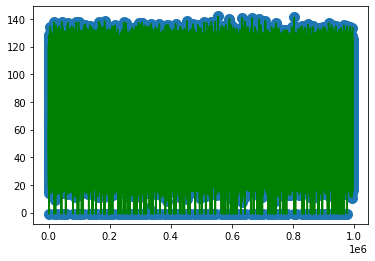

In [37]:
# Finally draw figure of Multiple Linear Regression Model
X_train=np.arange(0,len(X_train),1)

import operator
plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

## Polynomial Regression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995889, 12)
(248973, 12)
(995889,)
(248973,)


In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly_df = PolynomialFeatures(degree = 2)
transform_poly = poly_df.fit_transform(X_train)

linreg2 = LinearRegression()
linreg2.fit(transform_poly,y_train)

polynomial_predict = linreg2.predict(transform_poly)

In [40]:
rmse = np.sqrt(mean_squared_error(y_train,polynomial_predict))
r2 = r2_score(y_train,polynomial_predict)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

#Accuracy score of the Ridge Regression model
print("Polynomial regression score : ", rd.score(X_test, y_test))

#Mean Square Error
print("Mean Square Error: ",mean_squared_error(y_train, polynomial_predict))

RMSE Score for Test set: 9.0
R2 Score for Test set: 0.83
Polynomial regression score :  0.7896033428232981
Mean Square Error:  80.487236


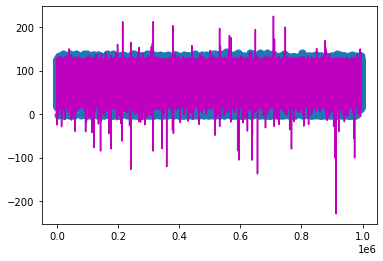

In [41]:
X_train=np.arange(0,len(X_train),1)

plt.scatter(X_train, y_train, s=50)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,polynomial_predict), key=sort_axis)
X_train, polynomial_predict = zip(*sorted_zip)
plt.plot(X_train, polynomial_predict, color='m')
plt.show()

## Summary

In using some of the standard regression models, the following findings can be derived:-

|     Model    | Accuracy Score | RSME |
|:------------:|----------------|------|
| **Random Forest** | 0.931 | 4.432 |
| Decision Tree | 0.875 | 5.963 |
| Lasso | 0.787 | 98.575 |
| Ridge | 0.786 | 97.404 |
| Multiple linear | 0.786 | 98.588 |
| Polynomial | 0.786 | 97.404 |

Random forest performed the best in contrast to the oher model. This can be shown by the model accuracy score and rsme.

# Strategy 2: Binning method

In [42]:
# Making a list of missing value types
missing_values = ["n/a", "na", "missing","nan"]
dx = pd.read_csv('C:/Users/olowe_m/OneDrive/DA Material/DS Exercise/engine_temperature_data.csv', na_values = missing_values).astype(np.float32)
dx.drop('Unnamed: 0', axis=1, inplace=True)
dx.drop('Temperature_4', axis=1, inplace=True)
dx.dropna(axis=0,inplace=True)
dx = dx.mask((dx - dx.mean()).abs() > 2 * dx.std()).dropna()
dx

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524586,19.156471,20.252920,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640839,20.221045,16.811695,20.393957,-2.094215,0.413976,18.0,26.265318
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836815,17.948296,20.050070,0.001141,0.205430,18.0,26.865345
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668421,19.827209,19.323597,17.240519,20.047195,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009193,17.400570,20.389725,0.233597,0.525972,18.0,31.672932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134741,46.081192,43.448563,37.791607,24.973909,1.870116,-0.108926,72.0,76.828758
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434473,46.698521,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926292
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515545,43.172043,37.478893,23.250498,1.362473,0.048257,72.0,77.421745
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814175,42.790451,38.066296,24.097227,-0.138888,0.165157,72.0,58.137478


In [43]:
X = dx.drop('Temperature_Engine', axis=1)
y = dx['Temperature_Engine']

In [44]:
from sklearn.preprocessing import KBinsDiscretizer

n_bins = 5
qt = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
qt.fit(dx[['Temperature_Engine']])

KBinsDiscretizer(encode='ordinal')

In [45]:
dx[['BIN_TE']] = qt.transform(dx[['Temperature_Engine']])
dx[['BIN_TE']] = dx[['BIN_TE']].astype(int)

In [46]:
dx[['Temperature_Engine', 'BIN_TE']]

,Temperature_Engine,BIN_TE
0,30.931990,0
1,26.265318,0
2,26.865345,0
3,28.393085,0
4,31.672932,0
...,...,...
1246452,76.828758,3
1246453,74.926292,3
1246454,77.421745,3
1246455,58.137478,1


In [47]:
scaled_X_names = [f"BIN_{x}" for x in X.columns]
print(scaled_X_names)

['BIN_Vq', 'BIN_Vd', 'BIN_Id', 'BIN_Iq', 'BIN_refrigerant_liquid', 'BIN_Temperature_1', 'BIN_Temperature_2', 'BIN_Temperature_3', 'BIN_Ambient_Temperature', 'BIN_RPM', 'BIN_Torque', 'BIN_Test_id']


In [48]:
dx[scaled_X_names] = qt.fit_transform(X)
dx[scaled_X_names] = dx[scaled_X_names].astype(int)
dx[scaled_X_names]

,BIN_Vq,BIN_Vd,BIN_Id,BIN_Iq,BIN_refrigerant_liquid,BIN_Temperature_1,BIN_Temperature_2,BIN_Temperature_3,BIN_Ambient_Temperature,BIN_RPM,BIN_Torque,BIN_Test_id
0,0,3,4,0,0,0,0,0,0,0,2,1
1,0,3,4,0,1,0,0,0,0,0,2,1
2,0,3,4,0,0,0,0,0,0,0,2,1
3,0,3,4,0,1,0,0,0,0,0,2,1
4,0,3,4,0,1,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,0,3,4,2,2,1,1,1,2,0,1,4
1246453,0,3,4,1,2,1,1,1,1,0,1,4
1246454,0,3,4,2,2,1,1,1,0,0,1,4
1246455,0,3,4,1,2,1,1,1,1,0,2,4


After quantization with 5 bins for each column variable, we get the above table.

In [50]:
scaled_X_names

['BIN_Vq',
 'BIN_Vd',
 'BIN_Id',
 'BIN_Iq',
 'BIN_refrigerant_liquid',
 'BIN_Temperature_1',
 'BIN_Temperature_2',
 'BIN_Temperature_3',
 'BIN_Ambient_Temperature',
 'BIN_RPM',
 'BIN_Torque',
 'BIN_Test_id']

## Decision Tree

In [51]:
X = dx[scaled_X_names]
y = dx['BIN_TE']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995889, 12)
(248973, 12)
(995889,)
(248973,)


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_preds = model.predict(X_test)

In [55]:
from sklearn import metrics
from sklearn.metrics import classification_report,accuracy_score,plot_precision_recall_curve,plot_roc_curve

model.score(X_test,y_test)

#Accuracy score of the Decision Tree model
print("Decision Tree score : ", model.score(X_test, y_test))
# get predicted prices on validation data using training data
print("Mean Square Error: ",mean_absolute_error(y_test, base_preds))

print(classification_report(y_test,base_preds))

Decision Tree score :  0.6795074164668458
Mean Square Error:  0.354247247693525
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     49810
           1       0.67      0.61      0.63     49726
           2       0.57      0.56      0.57     49877
           3       0.56      0.57      0.56     49643
           4       0.78      0.79      0.79     49917

    accuracy                           0.68    248973
   macro avg       0.68      0.68      0.68    248973
weighted avg       0.68      0.68      0.68    248973



## Random Forest

In [49]:
n_features = len(scaled_X_names)
embed_dim = 4
batch_size = 256

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
base_preds = model_rf.predict(X_test)

# get predicted prices on validation data using training data
print("Random Forest score : ", model_rf.score(X_test, y_test))
print("Mean Square Error: ", mean_absolute_error(y_test, base_preds))
print(classification_report(y_test,base_preds))


Random Forest score :  0.6812184453735948
Mean Square Error:  0.3514075823482868
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     49810
           1       0.67      0.61      0.64     49726
           2       0.58      0.56      0.57     49877
           3       0.55      0.57      0.56     49643
           4       0.78      0.79      0.79     49917

    accuracy                           0.68    248973
   macro avg       0.68      0.68      0.68    248973
weighted avg       0.68      0.68      0.68    248973



## TensorFlow Layer

In [58]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks
from tensorflow.keras import initializers

class QuantizedFeaturesEmbedding(layers.Layer):
  def __init__(self,
               n_features,
               n_bins,
               embed_dim,
               **kwargs):
    super(QuantizedFeaturesEmbedding, self).__init__(**kwargs)
    self.n_features = n_features
    self.n_bins = n_bins
    self.embed_dim = embed_dim
    
    assert self.n_features > 0
    assert self.n_bins > 0
    assert self.embed_dim > 0

def build(self, input_shape=None):
    self.embeddings = self.add_weight(
        shape=(self.n_features, self.n_bins, self.embed_dim),
        initializer=tf.keras.initializers.GlorotUniform(),
        name='quantized_features_embeddings')
    self.built = True

def _enumerate(self, ids):
    '''
    input: [[1,0,2,1], [0,2,1,1]]
    output: [[(0,1), (1,0), (2,2), (3,1)],
             [(0,0), (1,2), (2,1), (3,1)]]
    so that, for the first input:
    A[(0,1)] = feature 0, embedding 1
    A[(1,0)] = feature 1, embedding 0
    A[(2,2)] = feature 2, embedding 2
    A[(3,1)] = feature 3, embedding 1
    '''
    bs = ids.shape[0]
    pos = tf.expand_dims(tf.range(0, self.n_features), axis=0) # (0,1,2,..nf)
    pos = tf.tile(pos, tf.constant([bs, 1])) # repeat for this batch
    tf.assert_equal(pos.shape, ids.shape) 
    return tf.stack([pos, ids], axis=-1)

def call(self, ids):
    '''
    Input shape:
      2D tensor with shape (batch_size, n_features)
    Output shape:
      3D tensor with shape (batch_size, n_features, embed_dim)
    '''
    assert ids.shape[1] == self.n_features
    
    ids = tf.cast(ids, tf.int32)
    idx = self._enumerate(ids)
    return tf.gather_nd(self.embeddings, idx)


In [59]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, Embedding
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.losses import SparseCategoricalCrossentropy

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = tf.keras.models.Sequential([
       QuantizedFeaturesEmbedding(n_features=len(scaled_X_names), n_bins=n_bins, embed_dim=embed_dim),
        #the hidden Relu layers
        layers.Dense(512, activation='relu', input_shape=[12]),
        layers.Dense(256, activation='relu'),
        layers.Flatten(),
        #linear output later
        layers.Dense(n_bins, activation="softmax"),
])

model.compile(optimizer='adam', 
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])


In [60]:
dummy_inputs = tf.random.uniform((batch_size, n_features), 0, n_bins, dtype=tf.int32)
print(dummy_inputs.shape)
dummy_output = model(dummy_inputs)
print(dummy_output.shape)

(256, 12)
(256, 5)


In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantized_features_embeddin  (256, 12)                0         
 g (QuantizedFeaturesEmbeddi                                     
 ng)                                                             
                                                                 
 dense (Dense)               (256, 512)                6656      
                                                                 
 dense_1 (Dense)             (256, 256)                131328    
                                                                 
 flatten (Flatten)           (256, 256)                0         
                                                                 
 dense_2 (Dense)             (256, 5)                  1285      
                                                                 
Total params: 139,269
Trainable params: 139,269
Non-trai

In [62]:
X = dx[scaled_X_names]
y = dx['BIN_TE']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995889, 12)
(248973, 12)
(995889,)
(248973,)


In [64]:
SHUFFLE_BUFFER_SIZE = 250000

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(SHUFFLE_BUFFER_SIZE).batch(batch_size, drop_remainder=True)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size, drop_remainder=True)

In [65]:
history = model.fit(train_ds, epochs=50, validation_data=test_ds)

#callbacks=[early_stopping]

Epoch 1/50
3890/3890 [==============================] - 37s 9ms/step - loss: 0.8553 - sparse_categorical_accuracy: 0.6243 - val_loss: 0.8098 - val_sparse_categorical_accuracy: 0.6454
Epoch 2/50
3890/3890 [==============================] - 37s 9ms/step - loss: 0.7929 - sparse_categorical_accuracy: 0.6520 - val_loss: 0.7860 - val_sparse_categorical_accuracy: 0.6553
Epoch 3/50
3890/3890 [==============================] - 35s 9ms/step - loss: 0.7736 - sparse_categorical_accuracy: 0.6598 - val_loss: 0.7648 - val_sparse_categorical_accuracy: 0.6642
Epoch 4/50
3890/3890 [==============================] - 35s 9ms/step - loss: 0.7627 - sparse_categorical_accuracy: 0.6643 - val_loss: 0.7587 - val_sparse_categorical_accuracy: 0.6658
Epoch 5/50
3890/3890 [==============================] - 38s 10ms/step - loss: 0.7558 - sparse_categorical_accuracy: 0.6671 - val_loss: 0.7513 - val_sparse_categorical_accuracy: 0.6706
Epoch 6/50
3890/3890 [==============================] - 51s 13ms/step - loss: 0.7504

In [66]:
history_df = pd.DataFrame(model.history.history)

<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

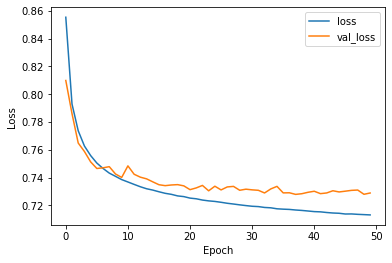

In [67]:
history_df[['loss', 'val_loss']].plot(xlabel="Epoch", ylabel="Loss")

<AxesSubplot:xlabel='Epoch', ylabel='Accuracy'>

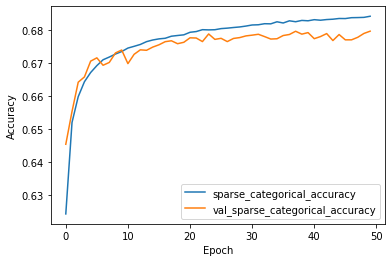

In [68]:
history_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot(xlabel="Epoch", ylabel="Accuracy")

In using the binning method, a classifier algorithm could be used to model the data. All three alogrithms gave very similar accuracy score, not performing as well as the regression models - this maybe be due to the loss of data when using the binning method in the process of reducing noise within the data.
The final (sparse) accuracy stopped at 68%. Not the best approach due to the computation power and time to train the model. However with further fine tuning, the accuracy of the model can be improved.

# Strategy 3: Model Baseline

As observed during EDA, the target variable exhibited characteristics of a biomodal distribution. As a results, a model baseline was considered as an approach to model the dataset.

In [69]:
# Making a list of missing value types
missing_values = ["n/a", "na", "missing","nan"]
dx = pd.read_csv('C:/Users/olowe_m/OneDrive/DA Material/DS Exercise/engine_temperature_data.csv', na_values = missing_values).astype(np.float32)
dx.drop('Unnamed: 0', axis=1, inplace=True)
dx.drop('Temperature_4', axis=1, inplace=True)
dx.dropna(axis=0,inplace=True)
dx = dx.mask((dx - dx.mean()).abs() > 2 * dx.std()).dropna()
dx

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id,Temperature_Engine
0,-0.522990,-0.497177,0.001435,0.041438,16.524586,19.156471,20.252920,17.938459,20.447550,-1.770534,0.378896,18.0,30.931990
1,-0.245248,-0.449791,0.207061,0.177095,16.838011,20.640839,20.221045,16.811695,20.393957,-2.094215,0.413976,18.0,26.265318
2,-0.519380,-0.371566,-0.024587,0.040105,16.461901,19.530918,18.836815,17.948296,20.050070,0.001141,0.205430,18.0,26.865345
3,-0.267732,-0.216253,-0.052532,-0.111152,16.668421,19.827209,19.323597,17.240519,20.047195,-0.051005,0.516955,18.0,28.393085
4,-0.400907,-0.405501,-0.318484,-0.158878,16.900026,19.591751,19.009193,17.400570,20.389725,0.233597,0.525972,18.0,31.672932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246452,-2.079912,0.897991,-1.901258,1.336346,29.134741,46.081192,43.448563,37.791607,24.973909,1.870116,-0.108926,72.0,76.828758
1246453,-2.228063,0.709176,-1.774801,0.806673,29.434473,46.698521,42.998806,37.115536,23.673018,2.584470,0.082514,72.0,74.926292
1246454,-2.015927,0.783710,-1.784774,1.267533,29.062447,46.515545,43.172043,37.478893,23.250498,1.362473,0.048257,72.0,77.421745
1246455,-2.421912,0.799235,-2.045271,0.983317,29.499044,45.814175,42.790451,38.066296,24.097227,-0.138888,0.165157,72.0,58.137478


In [70]:
X = dx.drop('Temperature_Engine', axis=1)
y = dx['Temperature_Engine']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(995889, 12)
(248973, 12)
(995889,)
(248973,)


In [72]:
dx.columns.tolist()

['Vq',
 'Vd',
 'Id',
 'Iq',
 'refrigerant_liquid',
 'Temperature_1',
 'Temperature_2',
 'Temperature_3',
 'Ambient_Temperature',
 'RPM',
 'Torque',
 'Test_id',
 'Temperature_Engine']

A majority of the below variables exhibit multiple peaks except for the ambient temperature and Engine temperature (target variable). As a result, it would appear that the the other variables within the data set are displaying a 'multimodal distribution'. Next steps, is to dig deeper into the data before we start building the model. 

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

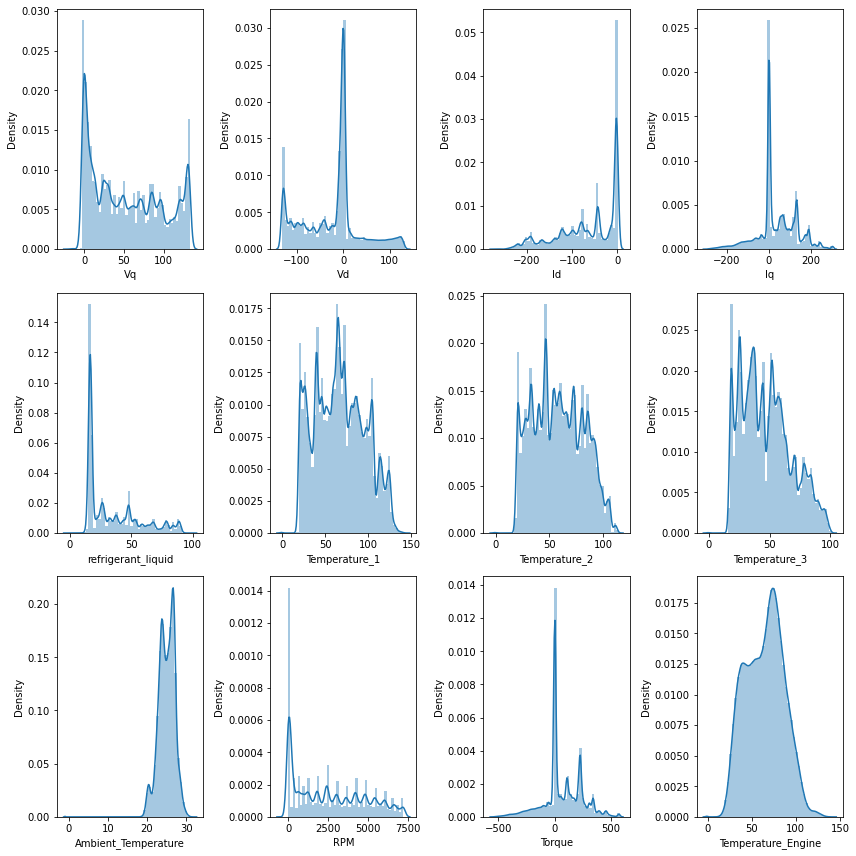

In [73]:
f, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))
#f.suptitle('Distribution of Features', fontsize=16)
sns.distplot(dx['Vq'], ax=ax[0, 0])
sns.distplot(dx['Vd'], ax=ax[0, 1])
sns.distplot(dx['Id'], ax=ax[0, 2])
sns.distplot(dx['Iq'], ax=ax[0, 3])

sns.distplot(dx['refrigerant_liquid'], ax=ax[1, 0])
sns.distplot(dx['Temperature_1'], ax=ax[1, 1])
sns.distplot(dx['Temperature_2'], ax=ax[1, 2])
sns.distplot(dx['Temperature_3'], ax=ax[1, 3])

sns.distplot(dx['Ambient_Temperature'], ax=ax[2, 0])
sns.distplot(dx['RPM'], ax=ax[2, 1])
sns.distplot(dx['Torque'], ax=ax[2, 2])
sns.distplot(dx['Temperature_Engine'], ax=ax[2, 3])

plt.tight_layout()
plt.show()


From a top level point of view, we can see that none of the features seem to be correlated to the target variable. In addition, there also seems to be highly correlates clusters within these variables.

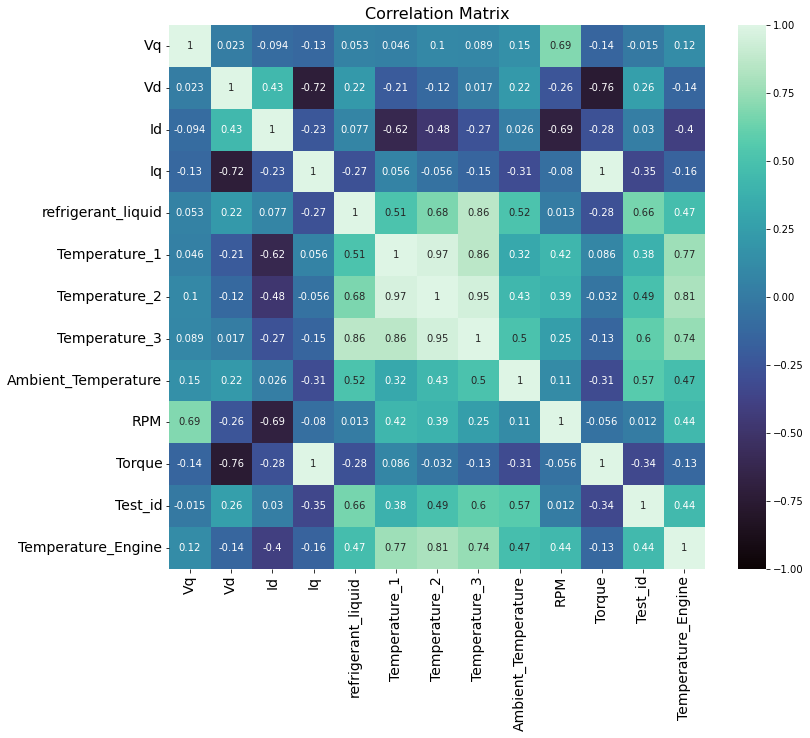

In [74]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title("Correlation Matrix", fontsize=16)
sns.heatmap(dx[dx.columns[dx.columns != 'id']].corr(), vmin=-1, vmax=1, cmap='mako', annot=True)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
    tick.label.set_rotation(90) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
    tick.label.set_rotation(0) 
plt.show()

In [75]:
# Baseline model parameters
model_params = {
    "objective": "root_mean_squared_error",
    "learning_rate": 0.1, 
    "seed": 42,
    'max_depth': 15,
    "num_leaves": 60,
    "min_data_in_leaf": 100,
    "force_col_wise": 'true',
    'colsample_bytree': .85,
    "subsample": .85,
    "learning_rate": 0.5
}
    
train_params = {
    "early_stopping_rounds": 100,
    "verbose_eval": 50,
}

def visualize_results(y_pred, y_train, features,feature_importances):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

    color = 'blue'
    ax[0].set_ylabel('Ground Truth', color=color, fontsize=14)
    sns.distplot(y_train, ax=ax[0], color=color)
    ax[0].tick_params(axis='y', labelcolor=color)

    ax2 = ax[0].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'red'
    ax2.set_ylabel('Predicted', color=color, fontsize=14)  # we already handled the x-label with ax1
    sns.distplot(pd.Series(y_pred), ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax[0].set_title('Distribution of Predicted Values and Ground Truth', fontsize=16)

    pd.DataFrame({'features' : features, 
                  'feature_importance': feature_importances}
                ).set_index('features').sort_values(by='feature_importance', ascending=False).head(10).plot(kind='bar', ax=ax[1])
    ax[1].set_title('Top 10 Most Important Features', fontsize=16)

    for tick in ax[1].yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
        tick.label.set_rotation(0) 

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    

,Vq,Vd,Id,Iq,refrigerant_liquid,Temperature_1,Temperature_2,Temperature_3,Ambient_Temperature,RPM,Torque,Test_id
944346,0.595397,-0.469001,-2.129611,1.129611,37.373787,44.343475,42.494938,38.637619,24.050640,-0.442135,0.011555,63.000000
200506,119.108925,-1.057829,-2.285208,1.220152,16.309546,31.172470,30.527306,24.807762,26.098738,3001.370361,-1.942590,10.000000
187444,4.277923,1.387097,-2.403464,0.825472,16.946789,20.143698,19.952589,17.310545,22.059172,119.669655,0.414968,4.000000
387583,9.971526,-11.633492,-99.351181,216.021225,16.519159,81.369804,59.566917,43.645332,20.160704,181.175049,399.170502,31.000000
1060880,0.401759,-0.653007,-1.972587,0.893496,67.940941,72.644035,70.790199,67.824455,27.604795,0.339598,0.041599,67.000000


Fold 1:
[LightGBM] [Info] Total Bins 2874
[LightGBM] [Info] Number of data points in the train set: 796711, number of used features: 12
[LightGBM] [Info] Start training from score 64.793365
Training until validation scores don't improve for 100 rounds
[50]	training's l2: 34.5562	valid_1's l2: 35.6016
[100]	training's l2: 31.5993	valid_1's l2: 33.0258
Did not meet early stopping. Best iteration is:
[100]	training's l2: 31.5993	valid_1's l2: 33.0258
RMSE: 5.74681

Fold 2:
[LightGBM] [Info] Total Bins 2874
[LightGBM] [Info] Number of data points in the train set: 796711, number of used features: 12
[LightGBM] [Info] Start training from score 64.787831
Training until validation scores don't improve for 100 rounds
[50]	training's l2: 34.5083	valid_1's l2: 35.0801
[100]	training's l2: 31.4083	valid_1's l2: 32.446
Did not meet early stopping. Best iteration is:
[100]	training's l2: 31.4083	valid_1's l2: 32.446
RMSE: 5.69614

Fold 3:
[LightGBM] [Info] Total Bins 2874
[LightGBM] [Info] Number o

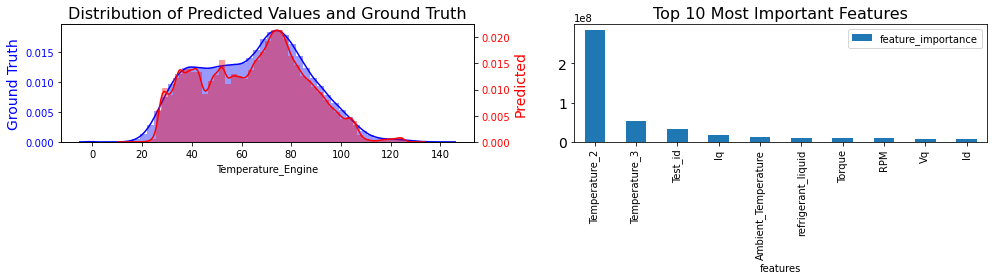

Accuracy Score:  0.934900


In [76]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")
SEED=42
N_SPLITS = 5

def run_model(X, y, X_test):
    """    
    Arg:
    * X: training data containing features
    * y: training data containing target variables
    * X_test: test data to predict
    
    Returns:
    * predictions for X_test
    """
    # Initialize variables
    y_oof_pred = np.zeros(len(X))
    y_test_pred = np.zeros(len(X_test))
    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=SEED)


    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        print(f"Fold {fold + 1}:")

        # Prepare training and validation data
        X_train = X.iloc[train_idx].reset_index(drop=True)
        X_val = X.iloc[val_idx].reset_index(drop=True)

        y_train = y.iloc[train_idx].reset_index(drop=True)
        y_val = y.iloc[val_idx].reset_index(drop=True)  

        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val)

        # Define model
        model = lgb.train(params=model_params,
                          train_set=train_data,
                          valid_sets=[train_data, val_data],
                          **train_params)

        # Calculate evaluation metric: Root Mean Squared Error (RMSE)
        y_val_pred = model.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_val_pred))
        print(f"RMSE: {score:.5f}\n")

        y_oof_pred[val_idx] = y_val_pred

        # Make predictions
        y_test_pred += model.predict(X_test)
        
    # Calculate evaluation metric for out of fold validation set
    oof_score = np.sqrt(mean_squared_error(y, y_oof_pred))
    print(f"OOF RMSE: {oof_score: 5f}")

    # Average predictions over all folds
    y_test_pred = y_test_pred / N_SPLITS
    visualize_results(y_oof_pred, y, X.columns, model.feature_importance(importance_type="gain"))

    return y_test_pred


features_baseline = X_train.columns[X_train.columns.str.startswith('cont')]
target = ['Temperature_Engine']

display(X_train.head().style.set_caption('Training data'))

y_pred = run_model(X_train, 
                   y_train, 
                   X_test)

accuracy = r2_score(y_test,y_pred)
print(f"Accuracy Score: {accuracy: 5f}")


The out of fold (OOF) RSME score is 5.7025247 - this is would be our benchmark for the next steps i.e. droping features/variables and applying the model to the data set. The score achieved is good however a RSME of 0 would be ideal. The distribution of the prediction also seems to have performed quite well.